In [158]:
import torch.nn as nn
import torch.nn.functional as F
import torch
import matplotlib
import matplotlib.pyplot as plt

class Dataset(torch.utils.data.Dataset):

    def __init__(self, file):
        self.data = []
        with open(file) as file:
            for line in file:
                self.data.append(line.strip('\n').split(' '))
                
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        data = torch.tensor([float(x) for x in (self.data[idx][0:2])])
        label = torch.tensor([float(self.data[idx][2])])
        return data, label

In [159]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(2, 1)

    def forward(self, x):
        x = self.fc1(x)
        return F.log_softmax(x, dim=1)

In [160]:
train_dataset = Dataset('simpledata/samplestr.txt')
test_dataset = Dataset('simpledata/sampleste.txt')
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, num_workers=1)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, num_workers=1)

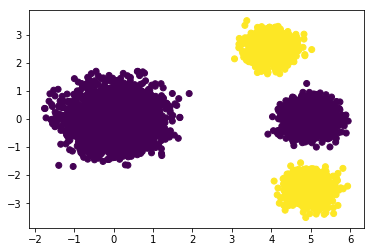

In [161]:
plot_train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1)

x = []
y = []
targets = []
for data, target in plot_train_loader:
    x.append(data[0][0].item())
    y.append(data[0][1].item())
    targets.append(target.item())
    
plt.scatter(x,y, c=targets)

In [162]:
epoch = 100
device = torch.device('cpu')
learningrate=0.1
model = NN()
optimizer=torch.optim.SGD(model.parameters(),lr=learningrate, momentum=0.0, weight_decay=0)
training_loss_list = []

for x in range(epoch):
    samples_trained = 0
    training_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.binary_cross_entropy_with_logits(output, target)
        training_loss+= loss.item()
        loss.backward()
        optimizer.step()
        samples_trained += data.size()[0]
    training_loss /= samples_trained
    training_loss_list.append(training_loss)

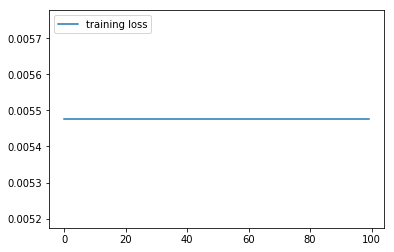

In [163]:
plt.plot(training_loss_list, label='training loss')
plt.legend(loc='upper left')
plt.show()

In [164]:
import random


class NewDataset(torch.utils.data.Dataset):

    def __init__(self, file):
        self.pos_sample = []
        self.neg_sample = []
        with open(file) as file:
            for line in file:
                x, y, label = line.strip('\n').split(' ')
                if float(label) == 0:
                    self.neg_sample.append(torch.tensor([float(x), float(y)]))
                else:
                    self.pos_sample.append(torch.tensor([float(x), float(y)]))
                
    def __len__(self):
        return len(self.pos_sample) + len(self.neg_sample)
    
    def __getitem__(self, idx):
        if idx % 2 == 0:
            return random.choice(self.neg_sample), torch.tensor([0.0])
        else:
            return random.choice(self.neg_sample), torch.tensor([1.0])

In [165]:
train_dataset = NewDataset('simpledata/samplestr.txt')
test_dataset = NewDataset('simpledata/sampleste.txt')
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, num_workers=1)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, num_workers=1)

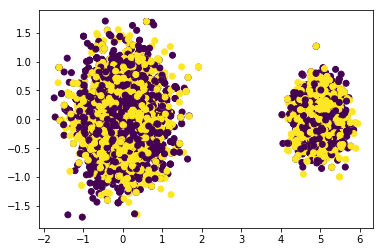

In [175]:
plot_train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1)

x = []
y = []
targets = []
for data, target in plot_train_loader:
    x.append(data[0][0].item())
    y.append(data[0][1].item())
    targets.append(target.item())
    
plt.scatter(x,y, c=targets)

In [174]:
epoch = 5
device = torch.device('cpu')
learningrate=0.1
model = NN()
optimizer=torch.optim.SGD(model.parameters(),lr=learningrate, momentum=0.0, weight_decay=0)
training_loss_list = []

for x in range(epoch):
    samples_trained = 0
    training_loss = 0
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.binary_cross_entropy(output, target)
        print ([p for p in model.parameters()])
        training_loss += loss.item()
        loss.backward()
        optimizer.step()
        samples_trained += data.size()[0]
    training_loss /= samples_trained
    training_loss_list.append(training_loss)

[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_g

[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_g

[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_g

[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_g

[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_grad=True), Parameter containing:
tensor([-0.2002], requires_grad=True)]
[Parameter containing:
tensor([[-0.1741, -0.1805]], requires_g

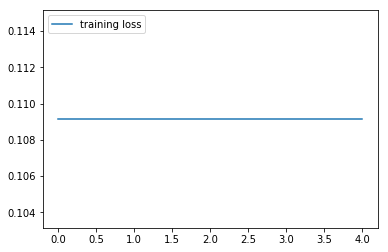

In [172]:
plt.plot(training_loss_list, label='training loss')
plt.legend(loc='upper left')
plt.show()